In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai2-cohort-5-homework-contest/sample_submission .csv
/kaggle/input/ai2-cohort-5-homework-contest/kmnist_test.csv/kmnist_test.csv
/kaggle/input/ai2-cohort-5-homework-contest/kmnist_train.csv/kmnist_train.csv


In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.layers import BatchNormalization

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h1>PART 2.1 [30 pts]: Kannada MNIST Kaggle competition using ANNs </h1>

[Return to contents](#contents)


<a id="part2.1intro"></a>
<h2> Problem Statement </h2>

ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.

There are several methods used to improve ANN generalization. 

One approach is to use an architecture just barely wide or deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.

However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella term of "regularization".

In this problem, you are asked to regularize a network of a given architecture.

<a id="part2.1about"></a>

<h3> The Kannada MNIST Dataset </h3>

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F1e01bcc28b5ccb7ad38a4ffefb13cde0%2Fwondu.png?generation=1603204077179447&alt=media" style="float:right">

For this problem, we will be working with a modified version of [Kannada MNIST dataset](https://arxiv.org/pdf/1908.01242.pdf) , which is a large database of handwritten digits in the indigenous language *Kannada*.

This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. 

For this homework, we will simplify the problem by only use the digits labeled `0` and `1` owing to the similarity of the two symbols, and we want to use a total of 1200 samples for training (this includes the data you will use for validation).

To understand the dataset better, we recommend this [article](https://towardsdatascience.com/a-new-handwritten-digits-dataset-in-ml-town-kannada-mnist-69df0f2d1456) by Vinay Prabhu, the curator of the dataset.

<a id="part2data"></a>

<h3> Downloading the Data Files </h3>

Please download all files from Kaggle. **The link will be given soon.**

Here's a brief description of the available files:

- `kmnist_train.csv` is our training dataset and the last column contains our response class. The 784 other columns correspond to the pixel values of the 28x28 dimension image.

Class 0 means a sample is the handwritten digit `0` and class 1 means a sample is the handwritten digit `1` in the Kannada language.  

- `kmnist_test.csv` has a structure similar to `kmnist_train.csv`, however the class label column is NOT included in with the test set. `kmnist_test.csv` has 2000 samples. 

Kaggle leaderboard scores are accuracy scores calculated by Kaggle when you upload your predictions on this test set.

- `sample_submission.csv` is the format that kaggle will accept.

<a id="part2.1kaggle"></a>

<h3> AI2-C2 Homework Kaggle Competition </h3>

You need to create an account on Kaggle and join the competition. **The link is in the description.** 

**This is a limited participation competition. Please DO NOT share this link you will recieve.**

For more information on the rules governing this Kaggle competition, **please [see question 2.1.3 below](#part2_3).**

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h2>PART 2.1 Questions</h2>

**2.1.1 [5 points]** **Get the data:**

- Download data from the competition page.
- We will utilize `kmnist_test.csv` in question 2.1.3.4 only. 
- Load the data and use the matplotlib function `imshow` to display a handwritten 0 and a handwritten 1.

**2.1.2 [10 points]** **Overfit an ANN:** 

Build a fully-connected network (FCN) with the architecture given below using `tensorflow.keras` and assign it to a variable called `model_overfit`:

- Number of hidden layers: 3
- Nodes per hidden layer: 100, 100, 100
- Activation function: ReLU 
- Loss function: binary_crossentropy
- Output unit: Sigmoid 
- Optimizer: adam (use the defaults; no other tuning)
- Epochs: no more than 2,000
- Batch size: 128
- Validation size: 0.3

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F6a491ff8d4ff590dc8ded9a25461cd4b%2FScreenshot%202020-10-20%20at%209.42.36%20PM.png?generation=1603210420701577&alt=media) 
    
This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the number of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 

<a id="part2_3"></a>

**2.1.3 [15 points]** **Regularize overfit network:**

Create an ANN that doesn't overfit and compete on Kaggle.

**DON'TS**

**Don't change the architecture**. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. **No CNNs/RNNs/enhancements allowed for the competition.**

    
**NOTE**: We strongly discourage you to use a different training set than the one provided to you (Data augmentation is allowed). If the test set accuracy of your model in this notebook is significantly different than your kaggle submission score, you will receive zero credit for this segment of the homework.

    
**DOS**

You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You **should** experiment with data augmentation. 


- **2.1.3.1** Display your model summary and your training and validation accuracy and loss.


- **2.1.3.2** Print the difference between the training and validation accuracies and the difference between the training and validation losses for the final trained epoch used by your model.


- **2.1.3.3** Plot the training accuracy and validation accuracy as a function of epochs.


- **2.1.3.4** Generate your test set class predictions using your regularized model. Save those predictions to a `.csv` formatted file. Submit that `.csv` file to this Kaggle Competition for leaderboard scoring.


- **2.1.3.5** **Specify your Kaggle name that you have used on the leaderboard**. *We can't give you credit without this.*


    
**IMPORTANT NOTES ABOUT SCORING**:

- The **public leaderboard** on kaggle only displays your performance on 50% of the test set.


- After the competition is complete, the **private leaderboard** will show your performance on the FULL test set.
    
Only the **top 5** competitors (as ranked on the hidden private leaderboard) will be eligible for full credit on question 2.1.3 (out of **15 points**). Remaining competitors will be scored out of **10 points** only for 2.1.3.


**ADDITIONAL RULES:**

- Multiple Kaggle submissions are permitted, **just note** that you will need to choose, on Kaggle, which submission shall be used for final scoring.


- The version of your final notebook submitted on edStem **must contain the same model** used to generate to your chosen Kaggle submission.


- **Please do not manually label your submissions.** In other words, the labels should only be the outcome of your model.


- **No external data are allowed, please only use the KMNIST training data downloaded via the link above for training your model.**


- **Do not** create multiple accounts on Kaggle.

</div>

<a id="part2.1solutions"></a>

## PART 2.1 Solutions

[Return to contents](#contents)




<div class='exercise-r'>

**2.1.1** 
    
</div>

In [3]:
#loading the datsets
train_df = pd.read_csv("/kaggle/input/ai2-cohort-5-homework-contest/kmnist_train.csv/kmnist_train.csv")
test_df = pd.read_csv("/kaggle/input/ai2-cohort-5-homework-contest/kmnist_test.csv/kmnist_test.csv")

In [4]:
#train dataset
print(train_df.shape)
train_df.head()

(1200, 785)


,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784,output
0,56.514675,24.749116,15.420758,68.951633,13.760997,13.309949,68.951633,68.951633,13.309949,68.951633,...,31.413656,13.309949,23.733776,13.309949,13.309949,13.309949,68.951633,32.487911,13.309949,1
1,13.122449,13.122449,13.122449,13.122449,13.122449,13.122449,43.090392,15.339362,13.122449,13.122449,...,13.122449,13.122449,13.122449,24.566333,13.122449,13.122449,13.122449,13.409452,13.122449,1
2,56.228990,38.733386,43.356041,30.350765,30.350765,101.791573,30.350765,30.350765,101.791573,56.951487,...,30.350765,30.350765,30.350765,30.350765,30.350765,30.350765,50.652863,101.791573,30.350765,0
3,67.072705,33.257721,51.330661,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,...,73.689417,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,0
4,17.867347,17.867347,17.867347,28.235052,17.867347,17.867347,17.867347,53.074296,43.465014,17.867347,...,17.867347,28.893451,17.867347,17.867347,17.867347,17.867347,62.989647,17.867347,17.867347,0


- train dataset contains (28,28) pixel values and a output/label column
- 1200 observations

In [5]:
#test dataset
print(test_df.shape)
test_df.head()

(2000, 784)


,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
0,38.167092,38.167092,54.242517,82.402707,57.519895,38.167092,38.167092,38.167092,38.167092,83.975893,...,38.167092,38.167092,38.167092,38.167092,68.490056,60.846754,38.167092,38.167092,38.167092,38.167092
1,35.295784,21.289541,21.289541,35.614861,21.289541,21.289541,82.447909,21.289541,21.289541,21.289541,...,21.289541,21.289541,25.689617,21.289541,21.289541,21.289541,21.289541,21.289541,35.579927,21.289541
2,21.521684,21.521684,21.521684,21.521684,57.199072,21.521684,21.521684,83.038062,46.479759,64.182483,...,21.521684,21.521684,21.521684,58.240365,83.038062,43.627021,21.521684,21.521684,21.521684,21.521684
3,73.500705,17.146684,45.996388,17.146684,17.146684,17.146684,17.146684,17.146684,73.500705,25.910554,...,17.146684,17.146684,57.801082,17.146684,73.500705,17.146684,17.146684,17.146684,17.146684,17.146684
4,24.724490,24.724490,90.599163,24.724490,24.724490,24.724490,24.724490,53.192570,45.764022,57.982717,...,24.724490,24.724490,24.724490,87.932260,24.724490,24.724490,39.901236,90.599163,24.724490,24.724490


- test dataset only contains (28,28) pixel values.
- no target column
- 2000 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 785 entries, pixel 1 to output
dtypes: float64(784), int64(1)
memory usage: 7.2 MB


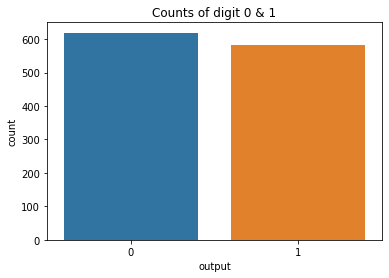

0    619
1    581
Name: output, dtype: int64


In [6]:
#visualization for labels distribution
train_df.info()
sns.countplot(train_df['output'])
plt.title('Counts of digit 0 & 1')
plt.show()
print(train_df['output'].value_counts())

In [7]:
#data preprocessing
X = train_df.drop(['output'],axis=1)
y = train_df.output
print('predictor shape',X.shape)
print('response shape',y.shape)

predictor shape (1200, 784)
response shape (1200,)


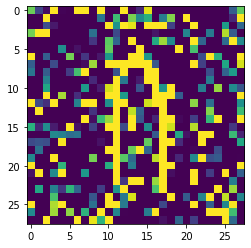

label 1


In [8]:
#showing sample image with label 1
X0 = X.iloc[:1,:]
img0 = np.reshape(np.asarray(X0),(28,28))
# cv2.imwrite('image0.png',img0)
plt.imshow(img0)
plt.show()
print('label',y[0])

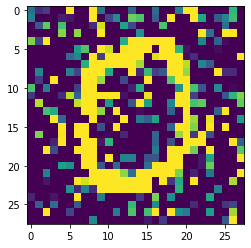

label 0


In [9]:
#showing sample image with label 0
X1 = X.iloc[2:3,:]
img1 = np.reshape(np.asarray(X1),(28,28))
# cv2.imwrite('image1.png',img1)
plt.imshow(img1)
plt.show()
print('label',y[2])

<div class='exercise-r'>

**2.1.2**
    
</div>

In [10]:
# train validation split
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.7,stratify=train_df.output,random_state=81)
print('---------Train set--------')
print('Input shape :', X_train.shape)
print('Output shape :', y_train.shape)
print('-----Validation set-------')
print('Input shape :', X_val.shape)
print('Output shape :', y_val.shape)

---------Train set--------
Input shape : (840, 784)
Output shape : (840,)
-----Validation set-------
Input shape : (360, 784)
Output shape : (360,)


In [11]:
#normalizing the predictors
# X_train, X_val = X_train/255.0 , X_val/255.0

<div class='exercise-r'>

**2.1.2**
    
</div>

In [12]:
# overfit model building
model_overfit = Sequential(name='model_overfit')
model_overfit.add(Dense(100,activation='relu',input_shape=(840, 784)))
model_overfit.add(Dense(100,activation='relu'))
model_overfit.add(Dense(100,activation='relu'))
model_overfit.add(Dense(1,activation='sigmoid'))
model_overfit.summary()

Model: "model_overfit"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 840, 100)          78500     
_________________________________________________________________
dense_1 (Dense)              (None, 840, 100)          10100     
_________________________________________________________________
dense_2 (Dense)              (None, 840, 100)          10100     
_________________________________________________________________
dense_3 (Dense)              (None, 840, 1)            101       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________


2022-12-02 19:30:41.005049: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
#model compilation
model_overfit.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# model training
# we use validation data instead of validation split 
# as the dataset already has been splet with 70/30 ratio
model_overfit_history=model_overfit.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=128,verbose=0)

2022-12-02 19:30:41.342741: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [15]:
model_overfit_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

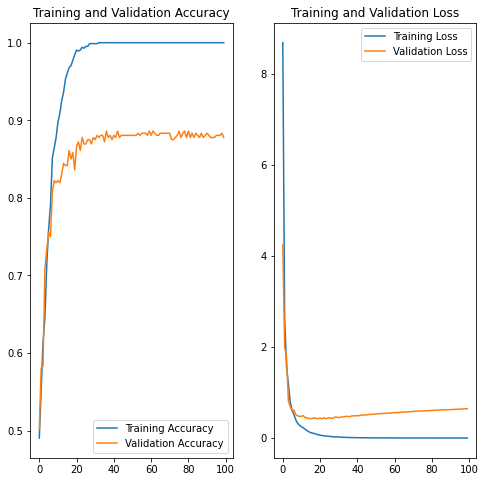

In [16]:
#plotting training and validation loss and accuracy
acc = model_overfit_history.history['accuracy']
val_acc = model_overfit_history.history['val_accuracy']

loss = model_overfit_history.history['loss']
val_loss = model_overfit_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1 , 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
#Displaying of training and validation accuracy
accuracy_history_df = pd.DataFrame(data=[{"Type":"model_overfit","Training Accuracy":acc[-1],"Validation Accuracy":val_acc[-1],"Epochs":len(acc)}])
display(accuracy_history_df)

,Type,Training Accuracy,Validation Accuracy,Epochs
0,model_overfit,1.0,0.877778,100


**INTERPRETATION:**

- as we can see from the accuracy observation surely this model overfits
- the training accuraci is 100% but the validation accuracy is ~87% which tells about the model memorizing the train data.

<div class='exercise-r'>

**2.1.3** 

**2.1.3.1**
    
</div>

In [18]:
# train validation split
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.7,stratify=train_df.output,random_state=81)
print('---------Train set--------')
print('Input shape :', X_train.shape)
print('Output shape :', y_train.shape)
print('-----Validation set-------')
print('Input shape :', X_val.shape)
print('Output shape :', y_val.shape)

---------Train set--------
Input shape : (840, 784)
Output shape : (840,)
-----Validation set-------
Input shape : (360, 784)
Output shape : (360,)


In [19]:
#Data agumentation
#normalizing the predictors
X_train, X_val = X_train/255.0 , X_val/255.0
# y_train, y_val = to_categorical(y_train),to_categorical(y_val)

In [20]:
# Regularized model building
from tensorflow.keras.regularizers import l2
model_regularized = Sequential(name='model_regularized')
model_regularized.add(Dense(100,activation='relu',input_shape=(840, 784)))
model_regularized.add(Dense(100,activation='relu',kernel_regularizer=l2(0.1)))
model_regularized.add(Dropout(0.3))
model_regularized.add(Dense(100,activation='relu',kernel_regularizer=l2(0.1)))
model_regularized.add(Dense(1,activation='sigmoid'))
model_regularized.summary()

Model: "model_regularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 840, 100)          78500     
_________________________________________________________________
dense_5 (Dense)              (None, 840, 100)          10100     
_________________________________________________________________
dropout (Dropout)            (None, 840, 100)          0         
_________________________________________________________________
dense_6 (Dense)              (None, 840, 100)          10100     
_________________________________________________________________
dense_7 (Dense)              (None, 840, 1)            101       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________


In [21]:
#model compilation
from tensorflow.keras import optimizers
model_regularized.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
# model training
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=2, min_lr=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
model_regularized_history=model_regularized.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32,verbose=0,callbacks=callback)

<div class='exercise-r'>

**2.1.3.2**
    
</div>

In [23]:
#Calculating training and validation loss and accuracy
acc = model_regularized_history.history['accuracy']
val_acc = model_regularized_history.history['val_accuracy']
loss = model_regularized_history.history['loss']
val_loss = model_regularized_history.history['val_loss']
print(f'difference between train and validation accuracy on last epoch : {np.abs(acc[-1]-val_acc[-1])*100:.4f}%')
print(f'difference between train and validation loss on last epoch : {np.abs(loss[-1]-val_loss[-1]):.4f}')

difference between train and validation accuracy on last epoch : 4.3254%
difference between train and validation loss on last epoch : 0.1025


<div class='exercise-r'>

**2.1.3.3**
    
</div>

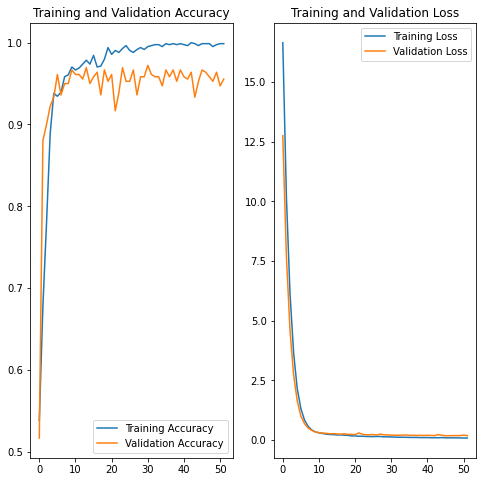

In [24]:
#plotting training and validation loss and accuracy

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1 , 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
#Displaying of training and validation accuracy
accuracy_history_df = pd.DataFrame(data=[{"Type":"model_overfit","Training Accuracy":acc[-1],"Validation Accuracy":val_acc[-1],"Epochs":len(acc)}])
display(accuracy_history_df)

,Type,Training Accuracy,Validation Accuracy,Epochs
0,model_overfit,0.99881,0.955556,52


In [26]:
_,train_acc = model_regularized.evaluate(X_train,y_train,batch_size=32)
_,vald_acc = model_regularized.evaluate(X_val,y_val,batch_size=32)

12/12 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9639


In [27]:
print(f'Train dataset Accuracy: {train_acc*100:.3f}%')
print(f'Validation dataset Accuracy: {vald_acc*100:.3f}%')

Train dataset Accuracy: 100.000%
Validation dataset Accuracy: 96.389%


<div class='exercise-r'>

**2.1.3.4**
    
</div>

In [28]:
#preprocessing
#scaling
X_test = test_df/255.0

In [29]:
#predictions
prediction = model_regularized.predict(X_test)
predicted_label_df = pd.DataFrame(data=prediction, columns=['category']) #converting to dataframe
pred_label=predicted_label_df.copy()
predicted_label_df.head()

,category
0,0.000012
1,0.456043
2,0.019714
3,0.854002
4,0.008615


In [30]:
#predictions to 0 & 1
pred_label['category'] = np.where(pred_label['category']>0.5,1,0)
pred_label.insert(0, 'id', range(0,len(pred_label)))
pred_label.head()

,id,category
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [31]:
pred_label.shape

(2000, 2)

In [32]:
#storing final csv to Output folder
pred_label.to_csv('submission.csv',index=False)

<div class='exercise-r'>

**2.1.3.5**
    
</div>

**YOUR KAGGLE LEADERBOARD NAME:**

### - Swarnava Bhattacharjee

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h1>PART 2.2 [30points]: KMNIST Classification using CNNs</h1>

[Return to contents](#contents)

In this part of Homework, you will now contruct a CNN-based model in order to best classify the Kannada MNIST dataset.

**2.2.1 [5 points]** Examine the dataset and prepare the data by appropriately standardizing, reshaping and type-checking. 

**2.2.2 [20 points]** Construct a simple CNN model - with not more than 10 layers. Please ensure that you use the following layers/parameters in order to contruct the model -
1. Maxpooling
2. Dense layers
3. Regularization methods such as Adam, Drop out, Batch Normalization etc. 

**2.2.3 [5 points]** Perform error analysis on the predictions of your model and report classification accuracy. This should also include loss plots that allow for comparision of the model performance across the epochs. Conclusively, provide a detailed inference of why certain misclassifications would have taken place.



</div>

<a id="part2.2solutions"></a>


## PART 2.2 Solutions

[Return to contents](#contents)


## 2.2.1

In [33]:
# train validation split
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, random_state=42,stratify=train_df.output)
print('---------Train set--------')
print('Input shape :', X_train.shape)
print('Output shape :', y_train.shape)
print('-----Validation set-------')
print('Input shape :', X_val.shape)
print('Output shape :', y_val.shape)

---------Train set--------
Input shape : (960, 784)
Output shape : (960,)
-----Validation set-------
Input shape : (240, 784)
Output shape : (240,)


In [34]:
# standerdizing,reshaping and type checking
height = 28
width = 28
channel = 1
# Standerdizing and data generator creation
train_datagen = ImageDataGenerator(rescale=1./255,
                            rotation_range=10,
                             shear_range=0.2,
                             zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
# reshaping
X_train = X_train.values.reshape((X_train.shape[0],height,width,channel))
X_val = X_val.values.reshape((X_val.shape[0],height,width,channel))
# type conversion
y_train, y_val = to_categorical(y_train),to_categorical(y_val)

In [35]:
#fitting the data generators
val_datagen.fit(X_val)
train_datagen.fit(X_train)

In [36]:
# creating flow of training batches 
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
X_batch , y_batch = train_generator.next()
print('X_batch shape:', X_batch.shape)
print('y_batch shape:', y_batch.shape)

X_batch shape: (32, 28, 28, 1)
y_batch shape: (32, 2)


## 2.2.2

In [37]:
#Building the CNN model
from tensorflow.keras.regularizers import l2
CNN_model = Sequential(name='CNN')
CNN_model.add(Conv2D(32,(2,2),activation='relu',input_shape=(28,28,1)))
CNN_model.add(Conv2D(64,(2,2),activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.2))
CNN_model.add(Conv2D(64,(2,2),activation='relu'))
CNN_model.add(MaxPooling2D((2,2)))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(64,kernel_regularizer=l2(0.001)))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(2,activation='sigmoid'))

In [38]:
#summary of the model
CNN_model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        16448     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256     

In [39]:
#definig callbacks and optimization of the CNN model
from tensorflow.keras import optimizers
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True)
CNN_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
#training the model ove epochs
epochs = 50
CNN_model_history = CNN_model.fit_generator(train_generator,
                                           steps_per_epoch=len(train_generator),
                                           epochs=epochs,
                                           verbose=1,
                                            validation_data = val_generator,
                                            validation_steps = len(val_generator),
                                           callbacks=callback)

Epoch 1/50
30/30 [==============================] - 3s 77ms/step - loss: 1.4187 - accuracy: 0.8417 - val_loss: 0.7762 - val_accuracy: 0.9167
Epoch 2/50
30/30 [==============================] - 2s 71ms/step - loss: 0.7023 - accuracy: 0.9229 - val_loss: 0.9752 - val_accuracy: 0.5167
Epoch 3/50
30/30 [==============================] - 2s 70ms/step - loss: 0.6368 - accuracy: 0.9198 - val_loss: 2.0117 - val_accuracy: 0.5167
Epoch 4/50
30/30 [==============================] - 2s 74ms/step - loss: 0.5893 - accuracy: 0.9302 - val_loss: 4.5103 - val_accuracy: 0.5167
Epoch 5/50
30/30 [==============================] - 2s 70ms/step - loss: 0.4657 - accuracy: 0.9375 - val_loss: 3.7160 - val_accuracy: 0.5167
Epoch 6/50
30/30 [==============================] - 2s 69ms/step - loss: 0.3788 - accuracy: 0.9521 - val_loss: 4.2536 - val_accuracy: 0.5167
Epoch 7/50
30/30 [==============================] - 2s 68ms/step - loss: 0.3930 - accuracy: 0.9500 - val_loss: 3.1340 - val_accuracy: 0.5167
Epoch 8/50
30

## 2.2.3

In [41]:
CNN_model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

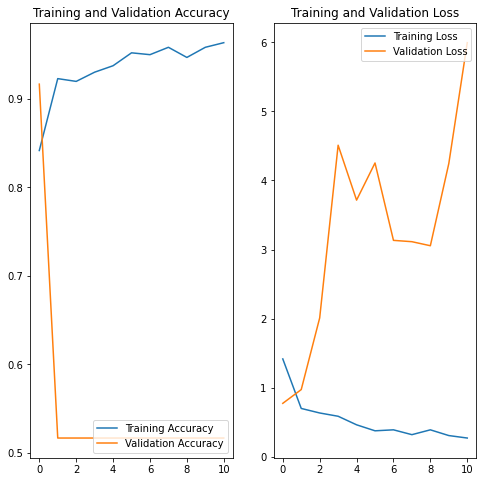

In [42]:
#plotting training and validation loss and accuracy
acc = CNN_model_history.history['accuracy']
val_acc = CNN_model_history.history['val_accuracy']

loss = CNN_model_history.history['loss']
val_loss = CNN_model_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1 , 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
#Displaying of training and validation accuracy
accuracy_history_df = pd.DataFrame(data=[{"Type":"CNN_Model","Training Accuracy":acc[-1],"Validation Accuracy":val_acc[-1],"Epochs":len(acc)}])
display(accuracy_history_df)

,Type,Training Accuracy,Validation Accuracy,Epochs
0,CNN_Model,0.963542,0.516667,11


**Error Analysis Inference:**
- As this is a noisy dataset that may lead to some misclassification(this may happen due to improper data collection techinques)
- This model can further be improved by appling:
    - The problem of overfitting can be solved by tuning layer,neurons or tuning dropout layers.
    - Hyperparameter tuning can help the model further.